<a href="https://colab.research.google.com/github/naoya5614/Practice/blob/main/Edit_gasyori100knock_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像処理100本ノック(20~30問)

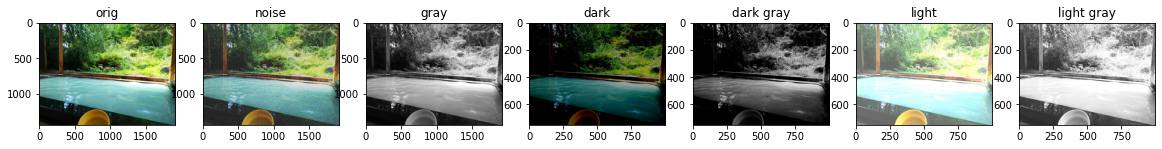

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://github.com/naoya5614/Practice/blob/main/img/sample05.jpg?raw=true')
img_noise = io.imread('https://github.com/naoya5614/Practice/blob/main/img/sample06.jpg?raw=true')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
img_dark = io.imread('https://github.com/naoya5614/Practice/blob/main/img/sample07.jpg?raw=true')
img_dark_gray = cv2.cvtColor(img_dark, cv2.COLOR_RGB2GRAY)
img_light = io.imread('https://github.com/naoya5614/Practice/blob/main/img/sample08.jpg?raw=true')
img_light_gray = cv2.cvtColor(img_light, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20, 4))
plt.subplot(1, 7, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 7, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 7, 3); plt.imshow(img_gray, cmap='gray'); plt.title('gray')
plt.subplot(1, 7, 4); plt.imshow(img_dark);  plt.title('dark')
plt.subplot(1, 7, 5); plt.imshow(img_dark_gray, cmap='gray'); plt.title('dark gray')
plt.subplot(1, 7, 6); plt.imshow(img_light);  plt.title('light')
plt.subplot(1, 7, 7); plt.imshow(img_light_gray, cmap='gray'); plt.title('light gray')
plt.show()

## Q.21 ヒストグラム正規化, Histogram normalization

ヒストグラムは偏ることがある。 
例えば、0に近い画素が多ければ画像は全体的に暗く、255に近い画素が多ければ画像は明るくなる。
ヒストグラムが局所的に偏っていることをダイナミックレンジが狭いなどと表現する。 そのため画像を人の目に見やすくするために、ヒストグラムを正規化したり平坦化したりなどの処理が必要である。

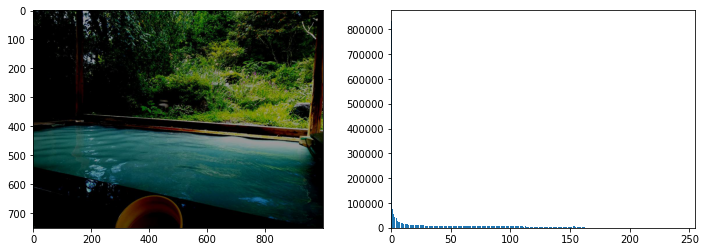

In [4]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.imshow(img_dark);
plt.subplot(1, 2, 2); plt.hist(img_dark.ravel(), bins=255);
plt.xlim([0, 255]); plt.show()

In [6]:
img_dark.min(), img_dark.max()

(0, 204)

In [7]:
# 解答
def hist_normalize(img, a, b):
    c, d = img.min(), img.max()
    # if c <= xin < d
    out = (b - a) / (d - c) * (img - c) + a
    # if xin < c
    out[img < c] = a
    # if xin > d
    out[img > d] = b
    return np.clip(out, 0, 255).astype(np.uint8) 

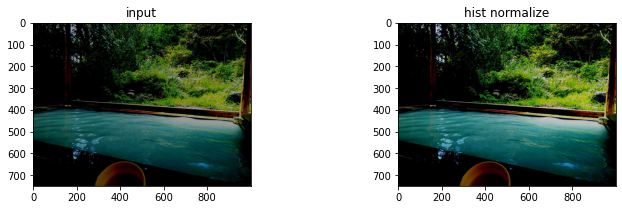

In [8]:
img_dark_hist_norm = hist_normalize(img_dark, a=0, b=255) # smoothing filtering

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist normalize'); plt.imshow(img_dark_hist_norm)
plt.show()

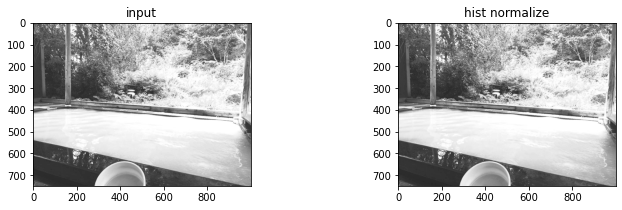

In [9]:
img_light_gray_hist_norm = hist_normalize(img_light_gray, a=0, b=255) # smoothing filtering

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_light_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('hist normalize'); plt.imshow(img_light_gray_hist_norm, cmap='gray')
plt.show()

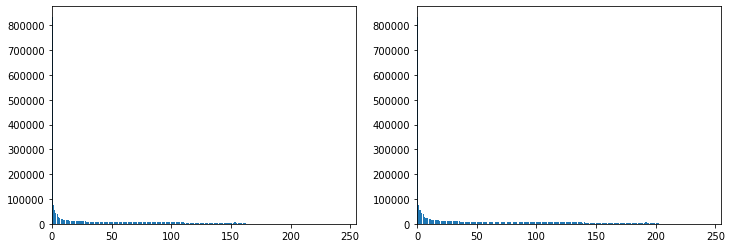

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([0, 255])
plt.subplot(1, 2, 2); plt.hist(img_dark_hist_norm.ravel(), bins=255); plt.xlim([0, 255])
plt.show()

## Q.22 ヒストグラムのスケーリングとシフト, Histogram scaling and shift

ヒストグラムの平均値をm0=128、標準偏差をs0=50になるように操作せよ。

これはヒストグラムのダイナミックレンジを変更するのではなく、ヒストグラムを平坦に変更する操作である。

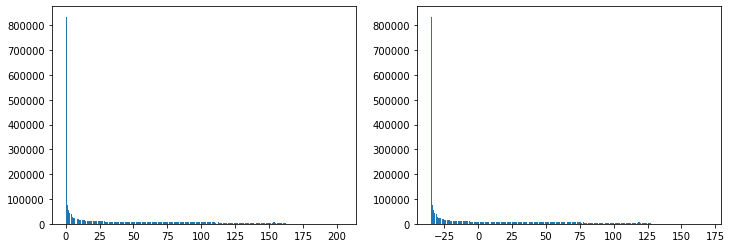

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255)
plt.subplot(1, 2, 2); plt.hist((img_dark - img_dark.mean()).ravel(), bins=255)
plt.show()

In [12]:
img_dark.std()

45.52548744673401

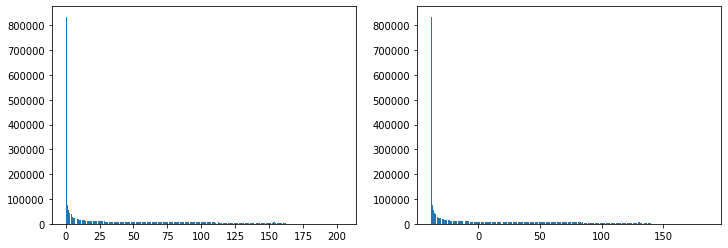

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255)
plt.subplot(1, 2, 2); plt.hist( 50 / img_dark.std() * (img_dark - img_dark.mean()).ravel(), bins=255)
plt.show()

In [15]:
# 解答 
def hist_scaleshift(img, m, s):
    m0, s0 = img.mean(), img.std()
    out = s / s0 * (img - m0) + m
    return np.clip(out, 0, 255).astype(np.uint8)

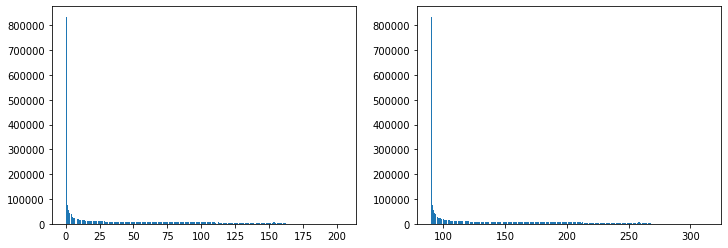

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255)
plt.subplot(1, 2, 2); plt.hist( 50 / img_dark.std() * (img_dark - img_dark.mean()).ravel() + 128, bins=255)
plt.show()

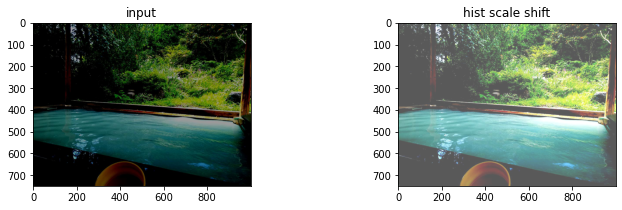

In [16]:
img_dark_hist_scaleshift = hist_scaleshift(img_dark, m=128, s=50) # smoothing filtering

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist scale shift'); plt.imshow(img_dark_hist_scaleshift)
plt.show()

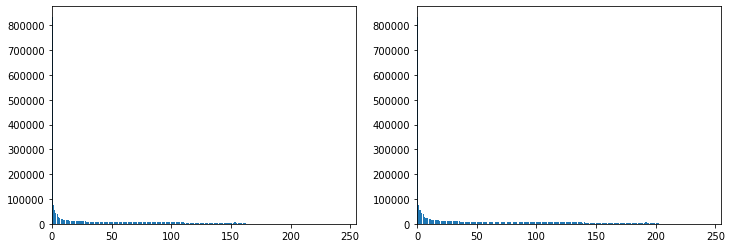

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([0, 255])
plt.subplot(1, 2, 2); plt.hist(img_dark_hist_norm.ravel(), bins=255); plt.xlim([0, 255])
plt.show()

## Q.23 ヒストグラム平坦化, Histogram equalization

ヒストグラム平坦化を実装せよ。

ヒストグラム平坦化とはヒストグラムを平坦に変更する操作であり、上記の平均値や標準偏差などを必要とせず、ヒストグラム値を均衡にする操作である。

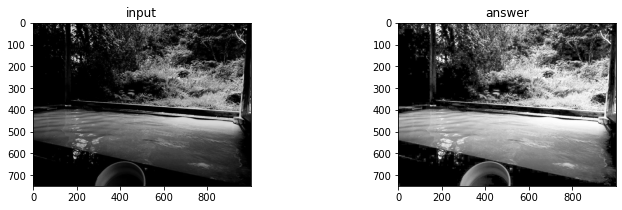

In [18]:
img_dark_hist_equ = cv2.equalizeHist(img_dark_gray)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_dark_hist_equ, cmap='gray')
plt.show()

In [19]:
# 解答
def hist_equ(img):
    out = np.zeros_like(img, dtype=np.float32)

    s = img.size
    x_max = 255
    h = 0

    for i in range(256):
        h += (img == i).sum()
        out[img == i] = x_max / s * h

    return np.clip(out, 0, 255).astype(np.uint8)

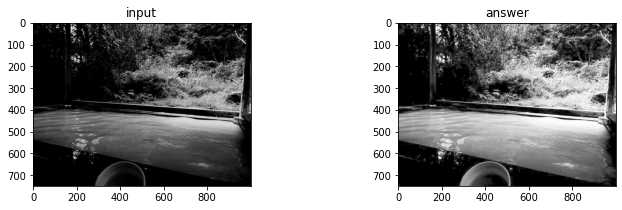

In [20]:
img_dark_gray_hist_equ = hist_equ(img_dark_gray)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_dark_gray_hist_equ, cmap='gray')
plt.show()

In [21]:
def hist_equ_rgb(img):
    out = np.zeros_like(img, dtype=np.float32)

    s = img.shape[0] * img.shape[1]
    x_max = 255

    for c in range(3):
        h = 0

        for i in range(256):
            h += (img[..., c] == i).sum()
            out[..., c][img[..., c] == i] = x_max / s * h

    return np.clip(out, 0, 255).astype(np.uint8)

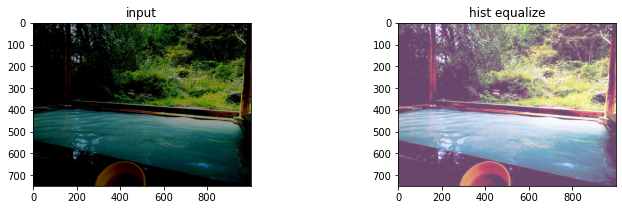

In [22]:
img_dark_hist_equ = hist_equ_rgb(img_dark)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist equalize'); plt.imshow(img_dark_hist_equ)
plt.show()

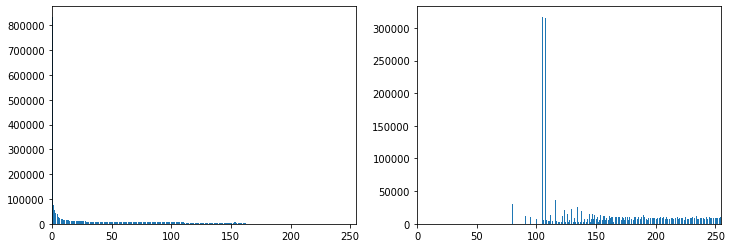

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([0, 255])
plt.subplot(1, 2, 2); plt.hist(img_dark_hist_equ.ravel(), bins=255); plt.xlim([0, 255])
plt.show()

In [24]:
def hist_equ_rgb_2(img):
    out = np.zeros_like(img, dtype=np.float32)

    s = img.size
    x_max = 255

    h = 0

    for i in range(256):
        h += (img == i).sum()
        out[img == i] = x_max / s * h

    return np.clip(out, 0, 255).astype(np.uint8)

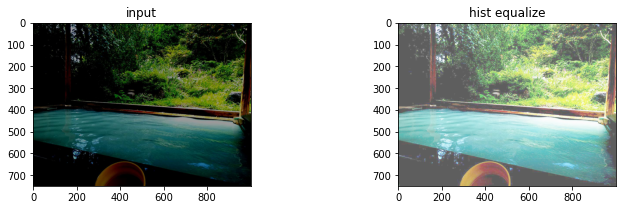

In [25]:
img_dark_hist_equ_2 = hist_equ_rgb_2(img_dark)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist equalize'); plt.imshow(img_dark_hist_equ_2)
plt.show()

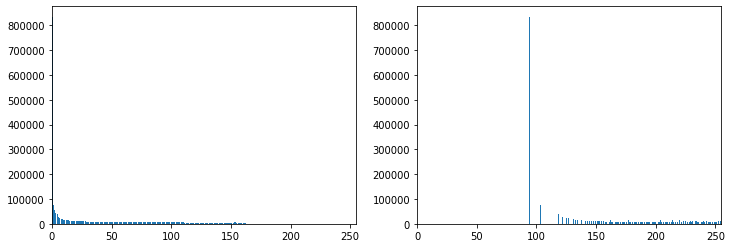

In [26]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([0, 255])
plt.subplot(1, 2, 2); plt.hist(img_dark_hist_equ_2.ravel(), bins=255); plt.xlim([0, 255])
plt.show()

## Q.24 ガンマ補正, Gamma correction

ガンマ補正とは、カメラなどの媒体の経由によって画素値が非線形的に変換された場合の補正である。 ディスプレイなどで画像をそのまま表示すると画面が暗くなってしまうため、RGBの値を予め大きくすることで、ディスプレイの特性を排除した画像表示を行うことがガンマ補正の目的である。

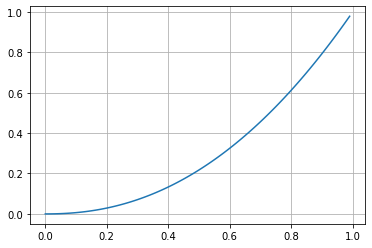

In [27]:
x = np.arange(0, 1, 0.01); plt.plot(x, x ** 2.2); plt.grid(); plt.show()

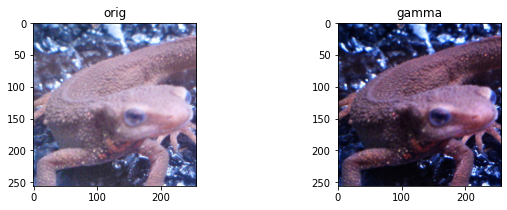

In [30]:
img_gamma = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_gamma.png')
img_orig1 = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1); plt.imshow(img_orig1); plt.title('orig')
plt.subplot(1, 2, 2); plt.imshow(img_gamma); plt.title('gamma')
plt.show()

In [31]:
# 解答
def gamma_corr(img, c, g):
    out = (1 / c * (img / 255)) ** (1 / g)
    return np.clip(out * 255, 0, 255).astype(np.uint8)

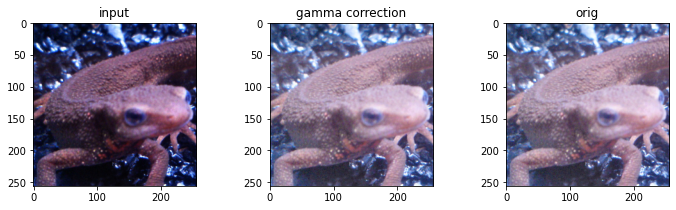

In [32]:
img_gamma_corr = gamma_corr(img_gamma, c=1, g=2.2)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_gamma)
plt.subplot(1, 3, 2); plt.title('gamma correction'); plt.imshow(img_gamma_corr)
plt.subplot(1, 3, 3); plt.title('orig'); plt.imshow(img_orig1)
plt.show()

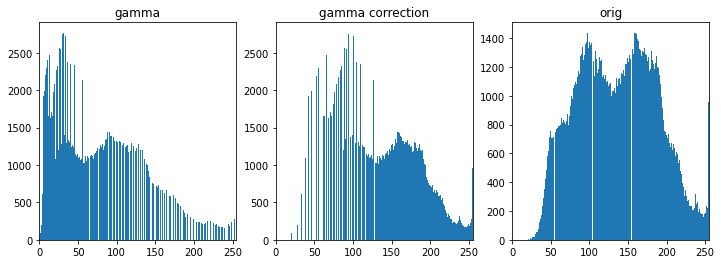

In [33]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.hist(img_gamma.ravel(), bins=255); plt.xlim([0, 255]); plt.title('gamma')
plt.subplot(1, 3, 2); plt.hist(img_gamma_corr.ravel(), bins=255); plt.xlim([0, 255]); plt.title('gamma correction')
plt.subplot(1, 3, 3); plt.hist(img_orig1.ravel(), bins=255); plt.xlim([0, 255]); plt.title('orig')
plt.show()

## Q.25 最近傍補間, Nearest nighbor interpolation (NN法)

最近傍補間により画像を1.5倍に拡大せよ。

最近傍補間(Nearest Neighbor)は画像の拡大時に最近傍にある画素をそのまま使う手法である。 シンプルで処理速度が速いが、画質の劣化は著しい。

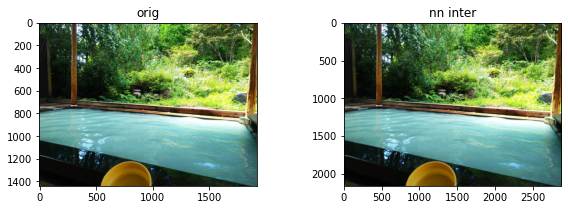

In [34]:
img_nn = cv2.resize(img_orig, (int(img_orig.shape[1] * 1.5), int(img_orig.shape[0] * 1.5)), 
                    interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 2, 2); plt.imshow(img_nn); plt.title('nn inter')
plt.show()

In [35]:
# 解答
def nn_inter(img, a, b):
    out_h = int(img.shape[0] * a)
    out_w = int(img.shape[1] * b)
    out = np.zeros([out_h, out_w, img.shape[2]], dtype=np.uint8)

    xs, ys = np.meshgrid(range(out_h), range(out_w))
    out[ys, xs] = img[np.round(ys / a).astype(int), np.round(xs / b).astype(int)]
    return out

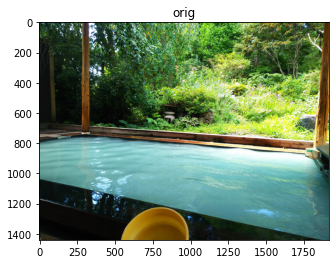

In [36]:
plt.imshow(img_orig); plt.title('orig'); plt.show()

## Q.26 バイリニア補間, Bi-linear interpolation

Bi-linear補間により画像を1.5倍に拡大せよ。

Bi-linear補間とは周辺の４画素に距離に応じた重みをつけることで補完する手法である。 計算量が多いだけ処理時間がかかるが、画質の劣化を抑えることができる。 縦にa倍、横にb倍にする場合で考える。

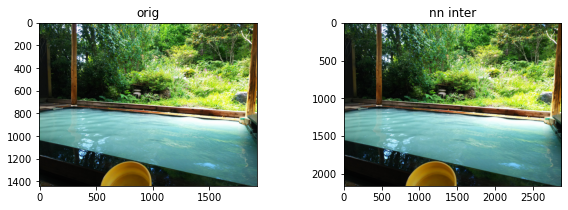

In [39]:
img_nn = cv2.resize(img_orig, (int(img_orig.shape[1] * 1.5), int(img_orig.shape[0] * 1.5)),
                    interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 2, 2); plt.imshow(img_nn); plt.title('nn inter')
plt.show()

In [40]:
# 解答
def bilinear_inter(img, a, b):
    h, w, c = img.shape
    out_h = int(h * a)
    out_w = int(w * b)

    xs, ys = np.meshgrid(range(out_w), range(out_h)) # output image index

    _xs = np.floor(xs / b).astype(int) # original x
    _ys = np.floor(ys / a).astype(int) # original y

    dx = xs / b - _xs
    dy = ys / a - _ys

    dx = np.repeat(np.expand_dims(dx, axis=-1), c, axis=-1) # repeat channel
    dy = np.repeat(np.expand_dims(dy, axis=-1), c, axis=-1) # repeat channel

    _xs1p = np.minimum(_xs + 1, w - 1)
    _ys1p = np.minimum(_ys + 1, h - 1)


    out = (1 - dx) * (1 - dy) * img[_ys, _xs] + dx * (1 - dy) * img[_ys, _xs1p] + \
                    (1 - dx) * dy * img[_ys1p, _xs] + dx * dy * img[_ys1p, _xs1p]

    return np.clip(out, 0, 255).astype(np.uint8)

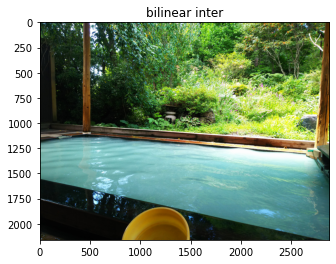

In [41]:
img_bl = bilinear_inter(img_orig, a=1.5, b=1.5)
plt.imshow(img_bl); plt.title('bilinear inter'); plt.show()

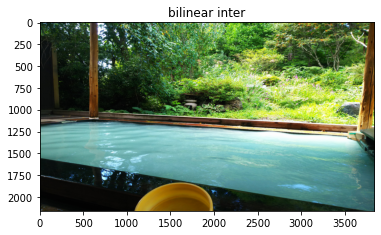

In [42]:
img_bl = bilinear_inter(img_orig, a=1.5, b=2)
plt.imshow(img_bl); plt.title('bilinear inter'); plt.show()

## Q.27 Bi-cubic補間

Bi-cubic補間により画像を1.5倍に拡大せよ。

Bi-cubic補間とはBi-linear補間の拡張であり、周辺の16画素から補間を行う。 縦にa倍、横にb倍にする場合で考える。

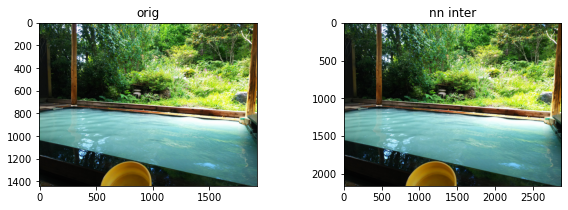

In [43]:
img_nn = cv2.resize(img_orig, (int(img_orig.shape[1] * 1.5), int(img_orig.shape[0] * 1.5)),
                    interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 2, 2); plt.imshow(img_nn); plt.title('nn inter')
plt.show()

In [44]:
# 解答
def bicubic_inter(img, a, b):
    h, w, c = img.shape
    out_h = int(h * a)
    out_w = int(w * b)
    out = np.zeros([out_h, out_w, c], dtype=np.float32)

    xs, ys = np.meshgrid(range(out_w), range(out_h)) # output image index

    _xs = np.floor(xs / b).astype(int) # original x
    _ys = np.floor(ys / a).astype(int) # original y

    dx1 = np.abs(xs / b - (_xs - 1))
    dx2 = np.abs(xs / b - _xs)
    dx3 = np.abs(xs / b - (_xs + 1))
    dx4 = np.abs(xs / b - (_xs + 2))
    dy1 = np.abs(ys / a - (_ys - 1))
    dy2 = np.abs(ys / a - _ys)
    dy3 = np.abs(ys / a - (_ys + 1))
    dy4 = np.abs(ys / a - (_ys + 2))

    dxs = [dx1, dx2, dx3, dx4]
    dys = [dy1, dy2, dy3, dy4]

    def weight(t, a=-1):
        w = np.zeros_like(t)
        w[t <= 1] = ((a + 2) * (t ** 3) - (a + 3) * (t ** 2) + 1)[t <= 1]
        w[t > 1] = (a * (t ** 3) - 5 * a * (t ** 2) + 8 * a * t - 4 * a)[t > 1]
        return w

    w_sum = np.zeros_like(out, dtype=np.float32)
    
    for j in range(-1, 3):
        for i in range(-1, 3):
            ind_x = np.minimum(np.maximum(_xs + i, 0), w - 1)
            ind_y = np.minimum(np.maximum(_ys + j, 0), h - 1)

            wx = weight(dxs[i + 1])
            wy = weight(dys[j + 1])
            wx = np.repeat(np.expand_dims(wx, axis=-1), 3, axis=-1)
            wy = np.repeat(np.expand_dims(wy, axis=-1), 3, axis=-1)

            w_sum += wx * wy
            out += wx * wy * img[ind_y, ind_x]

    return np.clip(out, 0, 255).astype(np.uint8)

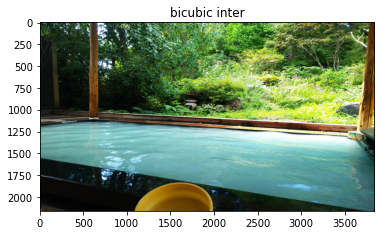

In [45]:
img_bc = bicubic_inter(img_orig, a=1.5, b=2)
plt.imshow(img_bc); plt.title('bicubic inter'); plt.show()

In [46]:
np.meshgrid(range(5), range(10))

[array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]), array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9]])]

In [47]:
tmp = np.zeros([15, 15])
tmp[np.meshgrid(range(5), range(10))] = 1
tmp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

## Q.28 アフィン変換(平行移動), Affine shift

アフィン変換を利用して画像をx方向に+30、y方向に-30だけ平行移動させよ。

アフィン変換とは3x3の行列を用いて画像の変換を行う操作である。

変換は(1)平行移動(Q.28) (2)拡大縮小(Q.29) (3)回転(Q.30) (4)スキュー(Q.31) がある。

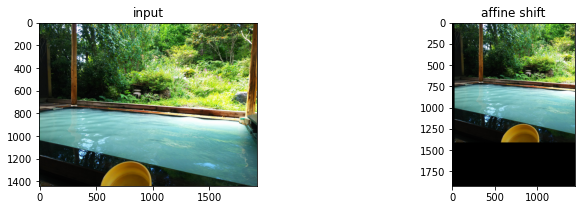

In [48]:
h, w, c = img_orig.shape
img_affine_shift = cv2.warpAffine(img_orig, np.array([[1, 0, 30], [0, 1, -30]], dtype=np.float32), (h, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()

In [49]:
# 解答
def affine(img, affine_mat, out_shape):
    h, w, channel = img.shape

    [a, b, tx], [c, d, ty] = affine_mat
    out_h, out_w = out_shape

    out = np.zeros([out_h, out_w, channel])

    # pad for black
    img_pad = np.pad(img, [(1, 1), (1, 1), (0, 0)])
    
    xs, ys = np.meshgrid(range(out_w), range(out_h)) # output image index

    _xs = np.maximum(np.minimum((1 / (a * d - b * c) * (d * xs - b * ys) - tx).astype(int) + 1, w + 1), 0) # original image index x
    _ys = np.maximum(np.minimum((1 / (a * d - b * c) * (- c * xs + a * ys) - ty).astype(int) + 1, h + 1), 0) # original image index y

    out[ys, xs] = img_pad[_ys, _xs]
    return np.clip(out, 0, 255).astype(np.uint8)

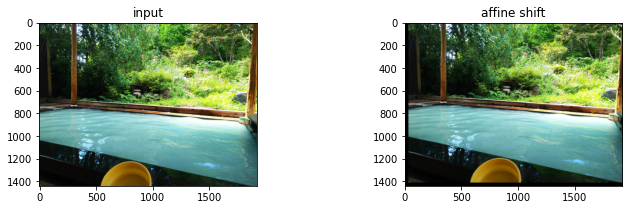

In [50]:
h, w, c = img_orig.shape
img_affine_shift = affine(img_orig, [[1, 0, 30], [0, 1, -30]], (h, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()

## Q.29 アフィン変換(拡大縮小), Affine scale

アフィン変換を用いて、(1)x方向に1.3倍、y方向に0.8倍にリサイズせよ。

また、(2) (1)の条件に加えて、x方向に+30、y方向に-30だけ平行移動を同時に実現せよ。

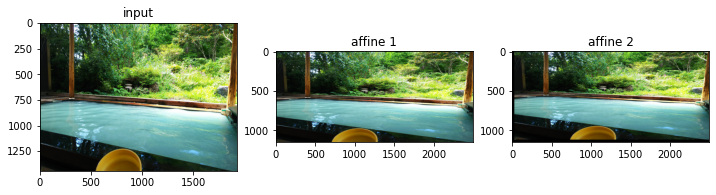

In [51]:
h, w, c = img_orig.shape
img_affine_2_1 = cv2.warpAffine(img_orig, np.array([[1.3, 0, 0], [0, 0.8, 0]], dtype=np.float32), (int(w * 1.3), int(h * 0.8)))
img_affine_2_2 = cv2.warpAffine(img_orig, np.array([[1.3, 0, 30], [0, 0.8, -30]], dtype=np.float32), (int(w * 1.3), int(h * 0.8)))

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 3, 2); plt.title('affine 1'); plt.imshow(img_affine_2_1)
plt.subplot(1, 3, 3); plt.title('affine 2'); plt.imshow(img_affine_2_2)
plt.show()

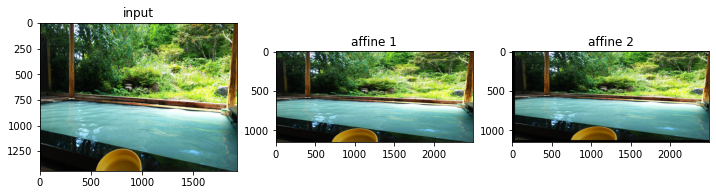

In [52]:
# 解答
h, w, c = img_orig.shape
img_affine_2_1 = affine(img_orig, [[1.3, 0, 0], [0, 0.8, 0]], (int(h * 0.8), int(w * 1.3)))
img_affine_2_2 = affine(img_orig, [[1.3, 0, 30], [0, 0.8, -30]], (int(h * 0.8), int(w * 1.3)))

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 3, 2); plt.title('affine 1'); plt.imshow(img_affine_2_1)
plt.subplot(1, 3, 3); plt.title('affine 2'); plt.imshow(img_affine_2_2)
plt.show()

## Q.30 アフィン変換(回転), Affine rotation

(1)アフィン変換を用いて、反時計方向に30度回転させよ。

(2) アフィン変換を用いて、反時計方向に30度回転した画像で中心座標を固定することで、なるべく黒い領域がなくなるように画像を作成せよ。 （ただし、単純なアフィン変換を行うと画像が切れてしまうので、工夫を要する。）

In [ ]:
h, w, c = img_orig.shape
img_affine_shift = cv2.warpAffine(img_orig, cv2.getRotationMatrix2D((0,0), 30, 1.0), (h, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()

In [53]:
cv2.getRotationMatrix2D((0,0), -30, 1.0)

array([[ 0.8660254, -0.5      ,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ]])

In [54]:
cv2.getRotationMatrix2D((w/2.0, h/2.0), -30, 1.0)

array([[   0.8660254 ,   -0.5       ,  488.61561237],
       [   0.5       ,    0.8660254 , -383.53829072]])

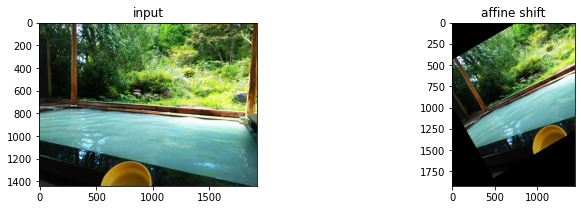

In [55]:
h, w, c = img_orig.shape
img_affine_shift = cv2.warpAffine(img_orig, cv2.getRotationMatrix2D((w / 2, h / 2), 30, 1.0), (h, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()

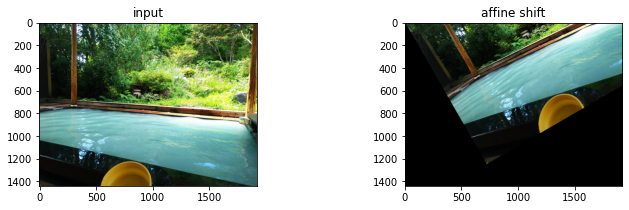

In [57]:
# 解答
rad = - 30 / 180 * np.pi
h, w, c = img_orig.shape
img_affine_shift = affine(img_orig, [[np.cos(rad), - np.sin(rad), 0], [np.sin(rad), np.cos(rad), -0]], (h, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()

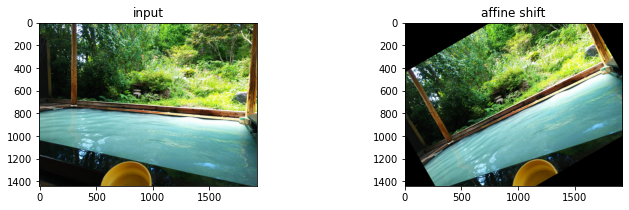

In [58]:
rad = - 30 / 180 * np.pi
h, w, c = img_orig.shape
tx = int((np.cos(- rad) - 1) * w // 2 - np.sin(- rad) * h // 2)
ty = int(np.sin(- rad) * w // 2 + (np.cos(- rad) - 1) * h // 2)

img_affine_shift = affine(img_orig, [[np.cos(rad), - np.sin(rad), tx], [np.sin(rad), np.cos(rad), ty]], (h, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()